## **Numpy** - Numerical Python

**NumPy** *(pronounced /ˈnʌmpaɪ/ NUM-py)* is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. The predecessor of NumPy, Numeric, was originally created by Jim Hugunin with contributions from several other developers. In 2005, Travis Oliphant created NumPy by incorporating features of the competing Numarray into Numeric, with extensive modifications. NumPy is open-source software and has many contributors. NumPy is fiscally sponsored by NumFOCUS. [wikipedia-numpy](https://en.wikipedia.org/wiki/NumPy)

---
### Resources
* [Official Page](https://numpy.org/)
* [Official Docs](https://numpy.org/doc/stable/)
* Lecture Notes *(refer to ../LectureNotes(HKUST)/12-numpy.pdf)*

#### Install & Test

In [ ]:
"""
To use numpy, you have to install it first.
In Jupiter notebook, type: 
"""
# %pip install numpy
""" 
to install in virtual environments (i.e. venv) 
Or, type: 
"""
# !pip install numpy
"""
to install globally.
Examples shown here are commented out, to execute,
simply remove leading '#'.
"""

In [1]:
# Then, we have to import numpy library
import numpy
# Let's verify numpy's version
print(numpy.version.__version__)

2.3.1


In [2]:
# p.s. You can create a nickname when you import a Python library
# For numpy, we typically use 'np'.
import numpy as np
# Now, the code below does exactly the same thing (checking the version)
print(np.version.__version__)

# If you wish to have a customized name, you can:
import numpy as candy

2.3.1


#### Numbers | *Or precisely, multidimensional array*

In [3]:
import numpy

# A single value scalar
# Note: ':numpy.ndarray' is type hinting, like 'int <variable>' in C
# However, Python uses dynamic typing meaning that what you specified is
# just a 'hint'. The actual type may vary.
scalar:numpy.ndarray = numpy.array(object = 10)
print(f"Scalar:\n\tshape: {scalar.shape}\n\tsize: {scalar.size}\n\titem: {scalar.item()}")
"""
Note that: If no arguments are provided, item() only works for arrays with a single element (a.size == 1).
It returns that single element.
"""

# 1-D array
# dtype is the short for 'data type'. You can specify the type of data
# Similarly, in C you have int[], float[], double[]
# p.s. 'float32' is 32 bit (not byte) floating point number.
# You can create a numpy ndarray using Python Tuple -> (a, b, c, ...) and List -> [a, b, c, ...]
array = numpy.array(object = (1, 2, 3, 4), dtype = numpy.float32)
# You can also create a continuous array faster (following code does exactly the same thing as previous).
"""
p.s. astype() function, by default, always returns a newly allocated array
in the specified data type.
"""
array = numpy.arange(start = 1, stop = 5).astype(dtype = numpy.float32) 
print(f"Array:\n\tshape: {array.shape}\n\tsize: {array.size}\n\titem: {array.item(3)}")

# 2-D array (Matrix)
matrix = numpy.array(object = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
# You can also use arange() here
# The following code have the same effect as above.
# p.s. arange() will ONLY create a 1-D array, so use reshape() to set up higher dimension
matrix = numpy.arange(start = 1, stop = 13).reshape((4, 3))
print(f"Matrix:\n\tshape: {matrix.shape}\n\tsize: {matrix.size}\n\titem: {matrix.item(3)}")

# For n-D, it's basically the same.

Scalar:
	shape: ()
	size: 1
	item: 10
Array:
	shape: (4,)
	size: 4
	item: 4.0
Matrix:
	shape: (4, 3)
	size: 12
	item: 4


#### Indexing | *Finding the right ONE? or MANY!*

In [4]:
import numpy

matrix = numpy.array(object = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Indexing like in C
print(f"Index:\n\t\
(0, 0) = {matrix[0][0]}\n\t\
(1, 1) = {matrix[1, 1]}\n\t\
(2, 1) = {matrix.item((2, 1))}\n\t\
(2, 1) = [the 8th element, flatten index 7] {matrix.item(7)}")
# p.s. [ x , y ] for integer x and y, it's the same as [x][y]
# for [ ... , ... , ... ] notation, we'll discuss later (slicing)

# Slicing (or selecting)
selected = matrix[ 0 : -1 : 1 , : ]
print("Matrix (original):\n", matrix, sep = '')
print("Selected:\n", selected, sep = '')
# Slicing returns you a VIEW: if you change the VIEW,
# the originals will be changed as well:
selected[1, 1] = 50
print("Matrix (original):\n", matrix, sep = '')
"""
Note that:
Standard notation of slicing (selecting) is: [ a : b : c , ...<next dimension>... ]
Which means:
At current dimension, select a -> b, a is included, b is excluded [a, b);
c is stepping, (see example below):
[ 1, 2, 3, 4, 5, 6 ] select the whole array with stepping c = 3 gives you:
[ 1,       4,      ], if c = 2 gives you:
[ 1,    3,    5,   ]

"""

# Masking (randomly select by a certain critera)
mask = matrix > 10
print("Mask (> 10):\n", mask, sep = '')
print("Matrix (> 10):\n", matrix[mask], sep = '')

"""
p.s. Something useful
numpy.where()
Applies a condition and returns elements from one array if the condition is true, 
and from another if false.
"""
pass

Index:
	(0, 0) = 1
	(1, 1) = 5
	(2, 1) = 8
	(2, 1) = [the 8th element, flatten index 7] 8
Matrix (original):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Selected:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix (original):
[[ 1  2  3]
 [ 4 50  6]
 [ 7  8  9]
 [10 11 12]]
Mask (> 10):
[[False False False]
 [False  True False]
 [False False False]
 [False  True  True]]
Matrix (> 10):
[50 11 12]


What I mean by "selecting":
(Like you use a mouse to select a piece of text.)

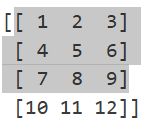

#### Operations | *'+', '-', '*', '/', 'dot_product'*